# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [19]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from sklearn import linear_model

In [6]:
# Your code here.
age=[17,51,27,21,36,48,19,26,54,30]
tardies=[10,1,5,9,4,2,9,6,0,3]
student_data = pd.DataFrame({'X': age, 'Y': tardies})

In [7]:
student_data

,X,Y
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

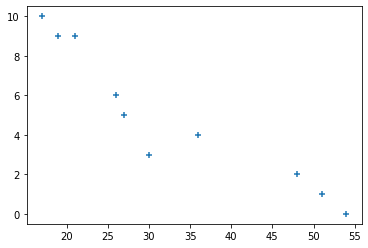

In [13]:
# Your code here.
plt.scatter(x=student_data['X'],y=student_data['Y'], marker='+', )
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [ ]:
# Your response here. 
## we can see a slight negative correlation between age and tardiness. As age increases, less tardiness seems to occur

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [18]:
# Your response here.
#correlation:
print(np.corrcoef(student_data['X'], student_data['Y']))

#covariance:
print(np.cov(student_data['X'], student_data['Y']))

## both covarianve and correlation are used to estimate the extent at which two or more sets of data relate to one another. both matrices are read diagonally. For the correlation matrix, the 1's
# represent the extent at which X correlates with itself, which is always 1 to (resulting in a perfect correlation (1)), and the values on the other diagonal axis shows the correlation coefficient 
# between X and Y which is -0.94, which signifies a strong negative correlation
# For the covaricance  matrix, the first diagonal represents the variance within the individual datasets and the other diagonal shows the covariance between both datasets.
## These values both show a negative correlation. based on the correlation (which uses pearson) we can assume a strong linear correlation.

[[ 1.         -0.93916269]
 [-0.93916269  1.        ]]
[[187.65555556 -45.56666667]
 [-45.56666667  12.54444444]]


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [21]:
# Your response here.
x = student_data[['X']]
y = student_data[['Y']]
model = linear_model.LinearRegression()
model.fit(x,y)


LinearRegression()

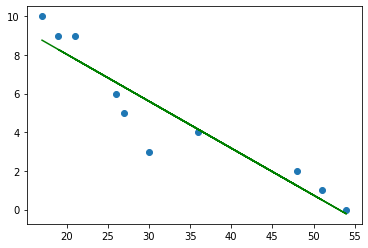

In [24]:
y_hat = model.intercept_+model.coef_[0]*x

plt.plot(x.values, y_hat.values, c='green')
plt.scatter(x,y)
plt.show()
##  the outcome variable in this instance is the tardiness. we can take this as our dependant variable. the regression we mapped is linear

Plot your regression model on your scatter plot.

In [ ]:
# Your code here.
# did it already by accident

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [ ]:
# Your response here. 
# Yes we can say that age is a good predictor for tardiness. People who are younger are statistically are more likely to skip class. we have shown that this relation ship is negative and linear. 

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [27]:
# Import any libraries you may need & the data
vehicles=pd.read_csv('vehicles.csv', index_col=False)
vehicles


,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35947,smart,fortwo coupe,2013,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35948,smart,fortwo coupe,2014,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,243.000000,1100
35949,smart,fortwo coupe,2015,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35950,smart,fortwo coupe,2016,0.9,3.0,Auto(AM6),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,39,36,246.000000,1100


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [35]:
# Your response here. 
char1=['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']

df1=vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
df2=vehicles[['CO2 Emission Grams/Mile']]

correl = {}
for i in char1:
    correl[i]=df1[i].corr(df2['CO2 Emission Grams/Mile'])
print(correl)
## The most useful variable is the fuel barrel/year. This can be seen by how close the value is to one. this would mean that a strong positive and linear correlation is present. The least useful is the 
# Year

{'Year': -0.222299602950538, 'Cylinders': 0.7523925537297638, 'Fuel Barrels/Year': 0.9861886621428501, 'Combined MPG': -0.9262290389336278, 'Fuel Cost/Year': 0.9308651512201666}


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

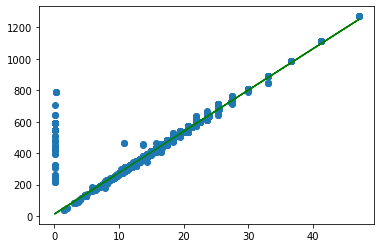

In [36]:
# Your response here. 
x = df1[['Fuel Barrels/Year']]
y = df2[['CO2 Emission Grams/Mile']]
model = linear_model.LinearRegression()
model.fit(x,y)
y_hat = model.intercept_+model.coef_[0]*x
plt.plot(x.values, y_hat.values, c='green')
plt.scatter(x,y)
plt.show()

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [ ]:
# Your response here. 


## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [38]:
# Your code here.
X=[1,3,4,6,8,9,11,14]
Y=[1,2,4,4,5,7,8,13]
df=pd.DataFrame({'X':X,'Y':Y})

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

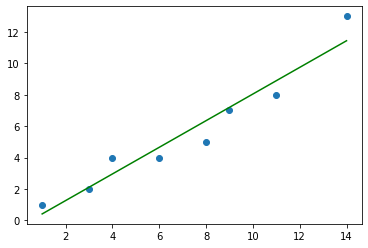

In [39]:
# Your code here.
x = df[['X']]
y = df[['Y']]
model = linear_model.LinearRegression()
model.fit(x,y)
y_hat = model.intercept_+model.coef_[0]*x
plt.plot(x.values, y_hat.values, c='green')
plt.scatter(x,y)
plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [41]:
# Your response here. 
## We see a strong positive linear correlation
model.score(x,y)

0.9316696375519905

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

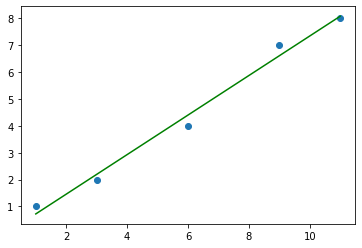

In [42]:
# Your response here. 
X=[1,3,6,9,11]
Y=[1,2,4,7,8]
df=pd.DataFrame({'X':X,'Y':Y})
x = df[['X']]
y = df[['Y']]
model = linear_model.LinearRegression()
model.fit(x,y)
y_hat = model.intercept_+model.coef_[0]*x
plt.plot(x.values, y_hat.values, c='green')
plt.scatter(x,y)
plt.show()

In [44]:
model.score(x,y)

0.9882985452245414

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 
## using the results of our R2 calc we see that by dropping our outliers we were able to generate a stronger linear correlation.